Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         xx/xx/xxxx
Name:         student name
Worked with:  other students' name
Location:     nyc17_ds10/student_submissions/challenges/01-mta/shaikh_reshama/challenge_set_1_reshama.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


### Challenge 1

In [74]:
import pandas as pd
import datetime

In [80]:
def clean_data(df):
    
    df.columns = ['C/A','UNIT','SCP','STATION','LINENAME',\
              'DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
    
    df['converted_time'] = pd.to_datetime(df['DATE']+' '+df['TIME'])
    df['turnstiles'] = df['C/A'] + '-' + df['UNIT'] + '-' + df['SCP'] + '-' + df['STATION']
    
    df_sorted = df.sort_values(['turnstiles', 'converted_time'])
    
    turnstile_df = df_sorted.groupby('turnstiles')
    df_sorted['entries_diff'] = turnstile_df['ENTRIES'].diff()
    df_sorted['exits_diff'] = turnstile_df['EXITS'].diff()
    
    df_sorted['entries_diff'] = df_sorted['entries_diff'].fillna(0)
    df_sorted['exits_diff'] = df_sorted['exits_diff'].fillna(0)
    
    
    return df_sorted

In [81]:
def remove_outliers(df_sorted):
    # calculates IQR for entries_diff
    Q3 = df_sorted['entries_diff'].quantile(0.75) 
    Q1 = df_sorted['entries_diff'].quantile(0.25)
    IQR = Q3 - Q1
    # calculates IQR range using outliers 
    IQR_range = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    IQR_range
    # removes values outside of lower and upper bounds
    df_sorted = df_sorted[df_sorted['entries_diff'].between(IQR_range[0], IQR_range[1])]
    # repeats process for exits_diff
    Q3_2 = df_sorted['exits_diff'].quantile(0.75) 
    Q1_2 = df_sorted['exits_diff'].quantile(0.25)
    IQR_2 = Q3_2 - Q1_2
    IQR_range_2 = (Q1_2 - 1.5 * IQR, Q3_2 + 1.5 * IQR)
    IQR_range_2
    df_sorted = df_sorted[df_sorted['exits_diff'].between(IQR_range_2[0], IQR_range_2[1])]
    return df_sorted

In [82]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190803.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190810.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190817.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190824.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190831.txt')
df_sorted = remove_outliers(clean_data(df1))


In [115]:
%matplotlib inline
import matplotlib.pyplot as plt


In [118]:
#Filter DF for data of just 1 turnstile, sort by date
single_turnstile = df_sorted[df_sorted.turnstiles == 'A002-R051-02-00-01-59 ST']
single_turnstile_sorted = single_turnstile.groupby('DATE').sum()

#Plot daily entries for 1 turnstile
plt.figure(figsize=(10,3))
x = single_turnstile_sorted.index
y = single_turnstile_sorted['entries_diff']
plt.scatter(x, y, s=100)
plt.xlabel('Date')
plt.ylabel('Daily Turnstile Entries')
plt.suptitle('Daily Entries For Turnstile A002-R051-02-00-01-59 ST'  )

Text(0.5, 0.98, 'Daily Entries For Turnstile A002-R051-02-00-01-59 ST')

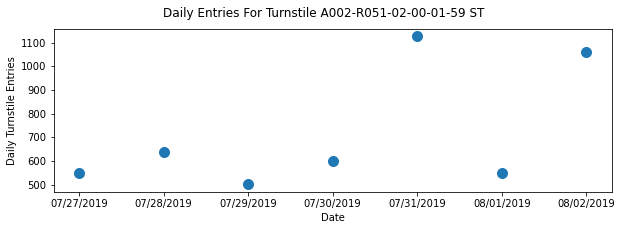

In [27]:
df = pd.concat([df1, df2, df3, df4, df5])

### Challenge 2

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032369 entries, 0 to 205262
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1032369 non-null  object
 1   UNIT                                                                  1032369 non-null  object
 2   SCP                                                                   1032369 non-null  object
 3   STATION                                                               1032369 non-null  object
 4   LINENAME                                                              1032369 non-null  object
 5   DIVISION                                                              1032369 non-null  object
 6   DATE                                                                  1032369 non-n

In [30]:
df['converted_time'] = pd.to_datetime(df['DATE']+' '+df['TIME'])

In [31]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,converted_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00


In [34]:
sort_df = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE']).min()

In [35]:
sort_df["NEW_ENTRIES"] = sort_df.ENTRIES.diff()

In [42]:
sort_df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [43]:
sort_df["NEW_EXITS"] = sort_df.EXITS.diff()

In [45]:
sort_df.head(30)

LINENAME DIVISION      TIME     DESC  \
C/A  UNIT SCP      STATION DATE                                              
A002 R051 02-00-00 59 ST   07/27/2019  NQR456W      BMT  00:00:00  REGULAR   
                           07/28/2019  NQR456W      BMT  00:00:00  REGULAR   
                           07/29/2019  NQR456W      BMT  00:00:00  REGULAR   
                           07/30/2019  NQR456W      BMT  00:00:00  REGULAR   
                           07/31/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/01/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/02/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/03/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/04/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/05/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/06/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/07/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/08/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/09/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/10/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/11/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/12/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/13/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/14/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/15/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/16/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/17/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/18/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/19/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/20/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/21/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/22/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/23/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/24/2019  NQR456W      BMT  00:00:00  REGULAR   
                           08/25/2019  NQR456W      BMT  00:00:00  REGULAR   

                                       ENTRIES    EXITS converted_time  \
C/A  UNIT SCP      STATION DATE                                          
A002 R051 02-00-00 59 ST   07/27/2019  7148288  2418935     2019-07-27   
                           07/28/2019  7149087  2419165     2019-07-28   
                           07/29/2019  7149679  2419350     2019-07-29   
                           07/30/2019  7151071  2419804     2019-07-30   
                           07/31/2019  7152467  2420369     2019-07-31   
                           08/01/2019  7153768  2420925     2019-08-01   
                           08/02/2019  7155187  2421416     2019-08-02   
                           08/03/2019  7156365  2421877     2019-08-03   
                           08/04/2019  7157129  2422125     2019-08-04   
                           08/05/2019  7157639  2422344     2019-08-05   
                           08/06/2019  7158872  2422814     2019-08-06   
                           08/07/2019  7160105  2423326     2019-08-07   
                           08/08/2019  7161310  2423834     2019-08-08   
                           08/09/2019  7162537  2424345     2019-08-09   
                           08/10/2019  7163695  2424838     2019-08-10   
                           08/11/2019  7164344  2425110     2019-08-11   
                           08/12/2019  7164911  2425333     2019-08-12   
                           08/13/2019  7166026  2425811     2019-08-13   
                           08/14/2019  7167144  2426339     2